In [1]:
import pylab as pl
import pandas as pd

In [2]:
run = 'single'

In [3]:
df = pd.read_csv('sigmas_{}.csv'.format(run))
df.sort_values(by='run', inplace=True)

df2 = df['run'].str.split('_', expand=True)
df['group'] = df2[1]




df.head()

,run,nobs,baseline,sigma_k,sigma_mp,group
26,timestamps_A_single_1.00_005,5,28.84,0.0133,0.0281,A
28,timestamps_A_single_1.00_010,10,49.11,0.1097,0.1787,A
4,timestamps_A_single_1.00_015,15,56.86,1.3501,1.1636,A
21,timestamps_A_single_1.00_020,20,96.91,0.6490,0.7881,A
27,timestamps_A_single_1.00_025,25,140.86,1.5221,1.6311,A


In [4]:
groups = df.groupby('group')

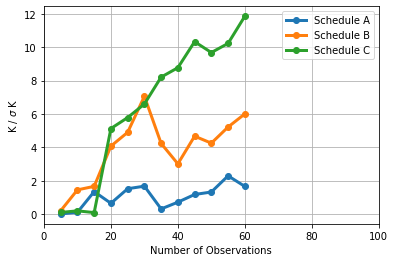

In [5]:
for group in groups:
    gf = group[1].sort_values(by='run')
    pl.plot(gf['nobs'], abs(gf['sigma_k']), 'o-', lw=3, label="Schedule "+gf['group'].iloc[0])

pl.xlabel('Number of Observations')
pl.ylabel('K / $\sigma$ K')
pl.xlim(0, 100)
# pl.ylim(0,7)
pl.legend()
pl.grid(True)
pl.savefig('{}_nobs.pdf'.format(run))
pl.show()

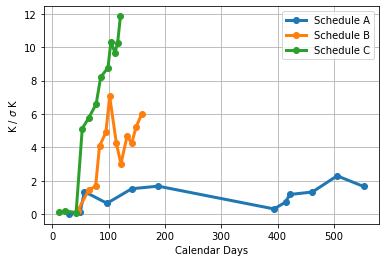

In [6]:
for group in groups:
    gf = group[1].sort_values(by='run')
    pl.plot(gf['baseline'], abs(gf['sigma_k']), 'o-', lw=3, label="Schedule "+gf['group'].iloc[0])

pl.xlabel('Calendar Days')
pl.ylabel('K / $\sigma$ K')
# pl.xlim(0, 100)
# pl.ylim(0,7)
pl.legend()
pl.grid(True)
pl.savefig('{}_baseline.pdf'.format(run))
pl.show()

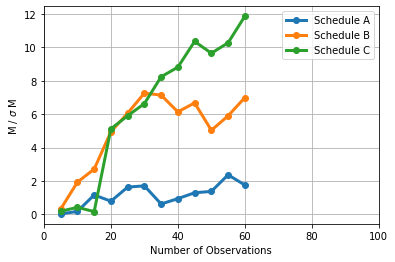

In [10]:
for group in groups:
    gf = group[1].sort_values(by='run')
    pl.plot(gf['nobs'], abs(gf['sigma_mp']), 'o-', lw=3, label="Schedule "+gf['group'].iloc[0])

pl.xlabel('Number of Observations')
pl.ylabel('M / $\sigma$ M')
pl.xlim(0, 100)
# pl.ylim(0,7)
pl.legend()
pl.grid(True)
pl.savefig('{}_nobs_m.png'.format(run))
pl.show()

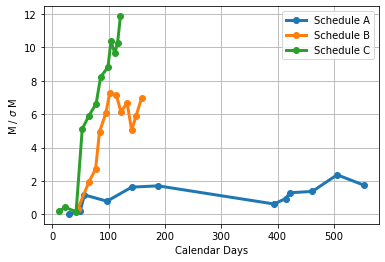

In [9]:
for group in groups:
    gf = group[1].sort_values(by='run')
    pl.plot(gf['baseline'], abs(gf['sigma_mp']), 'o-', lw=3, label="Schedule "+gf['group'].iloc[0])

pl.xlabel('Calendar Days')
pl.ylabel('M / $\sigma$ M')
# pl.xlim(0, 100)
# pl.ylim(0,7)
pl.legend()
pl.grid(True)
pl.savefig('{}_baseline_m.png'.format(run))
pl.show()